<a href="https://colab.research.google.com/github/Chinmayee-DS/DSC-ML-assignments/blob/master/Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
bos_ds = pd.DataFrame(boston.data)
print(bos_ds.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [5]:
bos_ds.columns = boston.feature_names
print(bos_ds.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [6]:
bos_ds.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 

In [7]:
bos_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [8]:
bos_ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
bos_ds['PRICE'] = boston.target
bos_ds = bos_ds.drop(['B'], axis = 1)
print(bos_ds.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7   5.33   36.2

[5 rows x 13 columns]


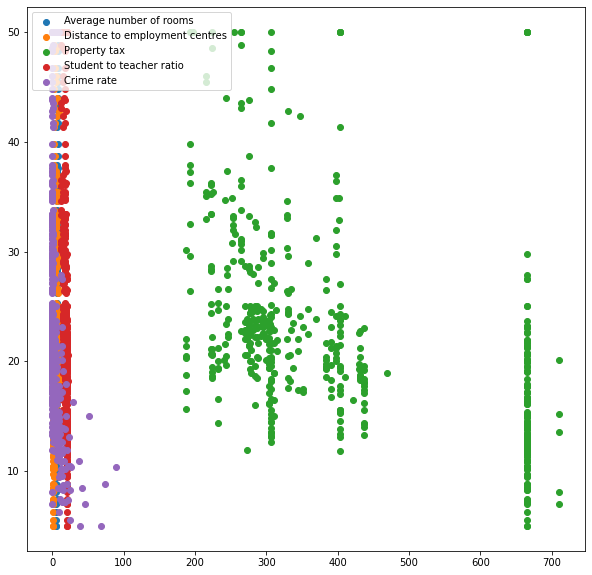

In [10]:
plt.figure(figsize=(10,10))

a = plt.scatter(bos_ds['RM'], bos_ds['PRICE'], label = 'Average number of rooms')
b = plt.scatter(bos_ds['DIS'], bos_ds['PRICE'], label = 'Distance to employment centres')
c = plt.scatter(bos_ds['TAX'], bos_ds['PRICE'], label = 'Property tax')
d = plt.scatter(bos_ds['PTRATIO'], bos_ds['PRICE'], label = 'Student to teacher ratio')
e = plt.scatter(bos_ds['CRIM'], bos_ds['PRICE'], label = 'Crime rate')

plt.legend(handles=[a, b, c, d, e], loc='upper left')


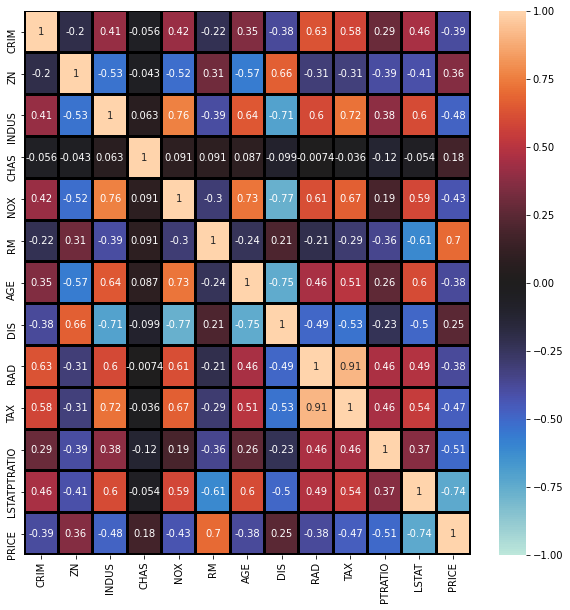

In [11]:
#ax = sns.heatmap(df[cols].corr(), cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(bos_ds.corr(), annot = True, vmin=-1, vmax=1, center= 0, linewidths=2, linecolor='black')

In [12]:
bos_ds.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'PRICE'],
      dtype='object')

In [14]:
x = bos_ds[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = bos_ds['PRICE']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predict=lin_reg.predict(x_test)
predict

array([28.95821495, 36.28754087, 14.09883571, 25.03314354, 17.60196806,
       23.29436764, 17.41497772, 13.6889158 , 22.03729908, 20.30090287,
       24.79283915, 18.38832326, -4.33294443, 21.56693306, 19.2845309 ,
       25.21698591, 20.49872474,  4.58687634, 40.37044823, 16.25684307,
       27.23092232, 30.00757759, 11.48463522, 24.08876594, 17.58648051,
       15.31043178, 22.59893811, 17.89670956, 22.53685855, 18.88561711,
       22.39289985, 25.12908716, 24.4061559 , 16.95999671, 16.34608298,
       17.83812389, 31.23964364, 20.11355948, 23.97427249, 24.7026198 ,
       13.51365336, 32.23874536, 42.57623121, 17.23647236, 27.36800252,
       15.83869172, 14.36670582, 25.88507693, 19.14362342, 29.98338277,
       21.02214978, 34.30047435, 15.76119774, 26.0702547 , 39.32897786,
       21.57141303, 17.57577742, 32.79951673, 25.03333768, 12.7303957 ,
       22.41675169, 30.40352449, 31.53053337, 17.1501077 , 20.44580503,
       16.7365876 , 19.23921681, 25.97868876, 30.71818893, 15.06

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

Mean Absolute Error: 3.111377388238187
Mean Squared Error: 22.777708563866103
Root Mean Squared Error: 4.772599769922689


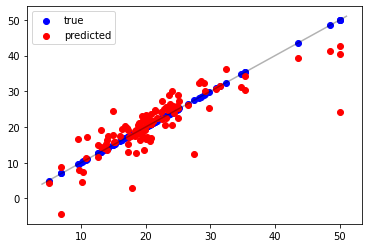

In [19]:

from scipy import stats

true = y_test
true_handle = plt.scatter(true, true, color='blue', label='true')

fit = np.poly1d(np.polyfit(true,true,1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

pred_handle = plt.scatter(true, predict, color='red', label='predicted')

plt.legend(handles=[true_handle,pred_handle], loc='upper left')